In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data = pd.read_csv('main_data.csv')
data['date'] = pd.to_datetime(data['date'])
data['date_lagged'] = data['date'].shift(1)
data['timestamp'] = data['date'].copy()

# Get to know with data, some charts & thoughts

I will focus on exploration mostly of volume, spread & close features, since others are derived from them

In [2]:
list(data.columns)

['date',
 'close',
 'volume',
 'spread',
 'mr_strength_ar_100',
 'half_life_ar_100',
 'theta_100',
 'half_life_ou_100',
 'hurst_100',
 'adf_p_100',
 'kpss_p_100',
 'var_ratio_100',
 'rs_ratio_100',
 'mr_strength_ar_1000',
 'half_life_ar_1000',
 'theta_1000',
 'half_life_ou_1000',
 'hurst_1000',
 'adf_p_1000',
 'kpss_p_1000',
 'var_ratio_1000',
 'rs_ratio_1000',
 'date_lagged',
 'timestamp']

In [3]:
data.describe()

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
count,931565,931565.000000,9.315650e+05,931563.000000,931365.000000,9.012630e+05,931362.000000,931362.000000,931365.000000,9.313650e+05,...,9.023940e+05,929563.000000,929563.000000,929565.000000,9.295650e+05,929565.000000,929565.000000,929565.000000,931564,931565
mean,2023-11-20 12:14:32.801061120,88.625005,5.651219e+04,-6.123293,0.070750,4.172372e+01,3.266478,7.650879,1.406246,4.541090e-01,...,3.538445e+02,0.336187,10.012807,1.459408,4.388212e-01,0.014162,0.912838,376.570022,2023-11-20 12:14:02.798325760,2023-11-20 12:14:32.801061120
min,2023-01-01 00:00:00,47.590000,0.000000e+00,-6.761143,0.000000,4.549013e-01,0.000770,0.002428,0.232798,1.525752e-22,...,5.609247e+00,0.000403,0.016337,0.529607,5.508129e-25,0.010000,0.164240,110.238779,2023-01-01 00:00:00,2023-01-01 00:00:00
25%,2023-06-11 17:52:00,69.940000,1.089543e+04,-6.303420,0.029875,7.165276e+00,0.102211,5.925858,1.280095,1.837576e-01,...,6.364542e+01,0.100002,6.180575,1.411153,1.771382e-01,0.010000,0.823513,341.128692,2023-06-11 17:51:45,2023-06-11 17:52:00
50%,2023-11-20 12:50:00,85.930000,2.422287e+04,-6.078193,0.055605,1.204543e+01,0.107009,6.477447,1.422347,4.346341e-01,...,1.064697e+02,0.100018,6.930239,1.460849,4.119454e-01,0.010000,0.898628,388.766345,2023-11-20 12:49:30,2023-11-20 12:50:00
75%,2024-04-30 06:25:00,100.080000,5.498528e+04,-5.980046,0.094920,2.150940e+01,0.116970,6.781554,1.550252,7.086179e-01,...,1.887470e+02,0.112149,6.931349,1.509018,6.831778e-01,0.010000,0.984081,422.679642,2024-04-30 06:24:15,2024-04-30 06:25:00
max,2024-10-08 23:59:00,178.370000,2.365486e+07,-5.451513,1.523731,1.796080e+06,285.469101,900.722421,2.090684,1.000000e+00,...,1.105522e+07,42.428907,1720.683890,1.942951,1.000000e+00,0.100000,2.335051,494.035922,2024-10-08 23:58:00,2024-10-08 23:59:00
std,NaN,24.242292,1.430801e+05,0.270167,0.060192,3.099014e+03,10.380870,26.539298,0.200098,3.013944e-01,...,2.116281e+04,0.938397,48.707816,0.076707,2.947310e-01,0.016297,0.140926,61.122172,NaN,NaN


In [4]:
data.head()

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
0,2023-01-01 00:00:00,51.97,26017.699,-5.762749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2023-01-01 00:00:00
1,2023-01-01 00:01:00,51.96,19181.147,-5.762754,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,2023-01-01 00:01:00
2,2023-01-01 00:02:00,51.93,6544.709,-5.763120,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:01:00,2023-01-01 00:02:00
3,2023-01-01 00:03:00,51.92,6101.511,-5.763041,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:02:00,2023-01-01 00:03:00
4,2023-01-01 00:04:00,51.94,15391.479,-5.762795,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:03:00,2023-01-01 00:04:00


In [5]:
data.tail()

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
931560,2024-10-08 23:55:00,143.11,34769.351,-6.073768,0.045703,15.166275,0.100001,6.931380,1.675312,0.473324,...,72.123254,0.100002,6.931361,1.491791,0.190745,0.01,0.995745,399.044731,2024-10-08 23:54:00,2024-10-08 23:55:00
931561,2024-10-08 23:56:00,143.09,31604.545,-6.073641,0.046123,15.028185,0.104888,6.608469,1.674431,0.471771,...,71.921129,0.100002,6.931360,1.497093,0.188947,0.01,0.992044,398.800214,2024-10-08 23:55:00,2024-10-08 23:56:00
931562,2024-10-08 23:57:00,143.14,20553.896,-6.073386,0.038190,18.149921,0.100001,6.931395,1.673937,0.603775,...,70.261258,0.100002,6.931358,1.501659,0.171052,0.01,0.988553,398.540896,2024-10-08 23:56:00,2024-10-08 23:57:00
931563,2024-10-08 23:58:00,143.13,25817.008,-6.073455,0.039528,17.535388,0.105396,6.576577,1.661102,0.580512,...,69.731497,0.100002,6.931357,1.503903,0.165960,0.01,0.982346,398.262231,2024-10-08 23:57:00,2024-10-08 23:58:00
931564,2024-10-08 23:59:00,143.05,69570.405,-6.073817,0.038174,18.157651,0.100001,6.931395,1.631449,0.601352,...,68.744893,0.100002,6.931356,1.503756,0.156073,0.01,0.981045,397.994076,2024-10-08 23:58:00,2024-10-08 23:59:00


In [6]:
data.iloc[98:199]

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
98,2023-01-01 01:38:00,51.73,2969.326,-5.767021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 01:37:00,2023-01-01 01:38:00
99,2023-01-01 01:39:00,51.73,755.258,-5.767015,0.036534,18.972656,0.103772,6.679521,1.343904,0.493238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 01:38:00,2023-01-01 01:39:00
100,2023-01-01 01:40:00,51.75,6482.591,-5.766877,0.038658,17.930376,0.103907,6.670855,1.353586,0.455004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 01:39:00,2023-01-01 01:40:00
101,2023-01-01 01:41:00,51.76,98.344,-5.766798,0.036643,18.916085,0.103616,6.689565,1.353565,0.507068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 01:40:00,2023-01-01 01:41:00
102,2023-01-01 01:42:00,51.77,11881.942,-5.766563,0.039669,17.473324,0.103825,6.676126,1.355862,0.450415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 01:41:00,2023-01-01 01:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2023-01-01 03:14:00,51.78,9446.220,-5.765626,0.054246,12.777801,0.103791,6.678275,1.565592,0.518885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:13:00,2023-01-01 03:14:00
195,2023-01-01 03:15:00,51.79,12495.770,-5.765166,0.055774,12.427676,0.103829,6.675822,1.582079,0.434492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:14:00,2023-01-01 03:15:00
196,2023-01-01 03:16:00,51.76,22705.055,-5.765746,0.059558,11.638136,0.104022,6.663467,1.609035,0.440516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:15:00,2023-01-01 03:16:00
197,2023-01-01 03:17:00,51.73,31182.836,-5.765993,0.059450,11.659395,0.103946,6.668352,1.600026,0.454572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:16:00,2023-01-01 03:17:00


In [7]:
plt.rcParams['figure.figsize'] = [15, 10]

<Axes: xlabel='date'>

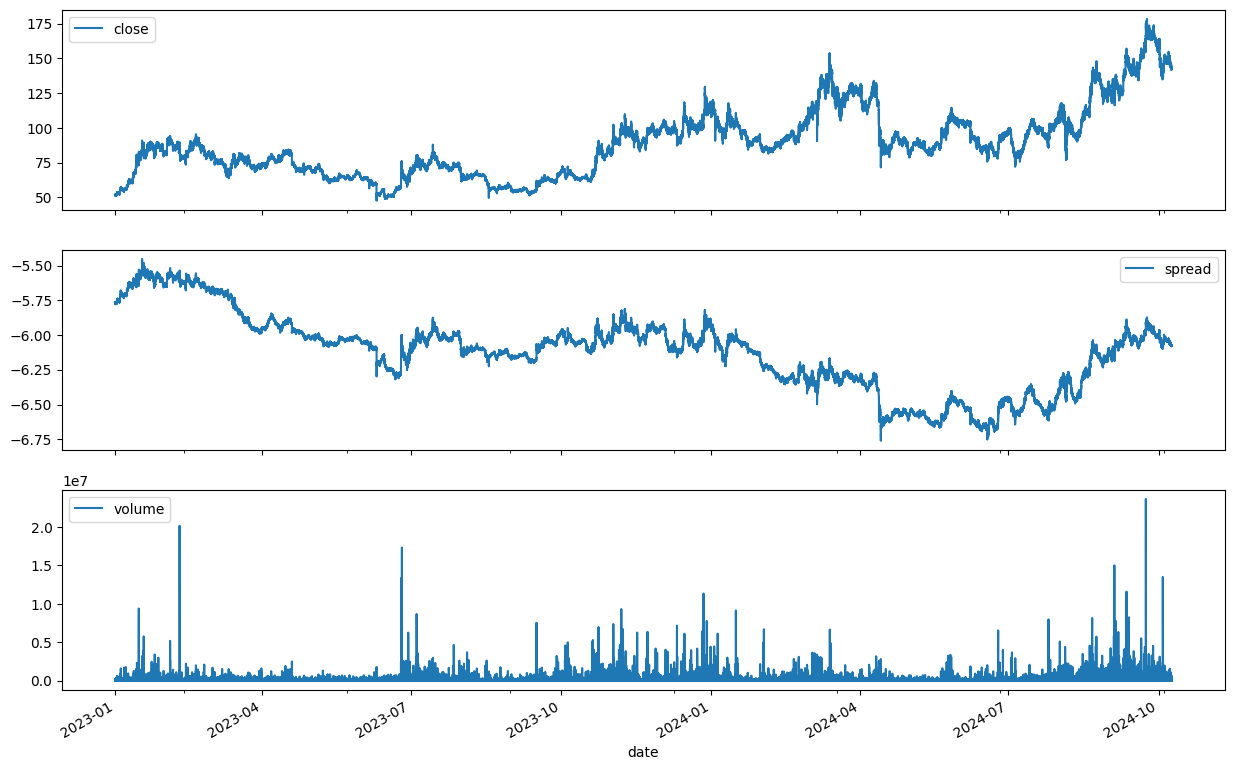

In [8]:
fig, ax = plt.subplots(3, 1, sharex=True)
data.plot(x='date', y='close', ax=ax[0])
data.plot(x='date', y='spread', ax=ax[1])
data.plot(x='date', y='volume', ax=ax[2])

looks that there are some correleated behaviors on volume spikes with spread/close

In [9]:
print(data[['volume', 'close']].corr())

          volume     close
volume  1.000000  0.180496
close   0.180496  1.000000


In [10]:
print(data[['volume', 'spread']].corr())

         volume   spread
volume  1.00000  0.03437
spread  0.03437  1.00000


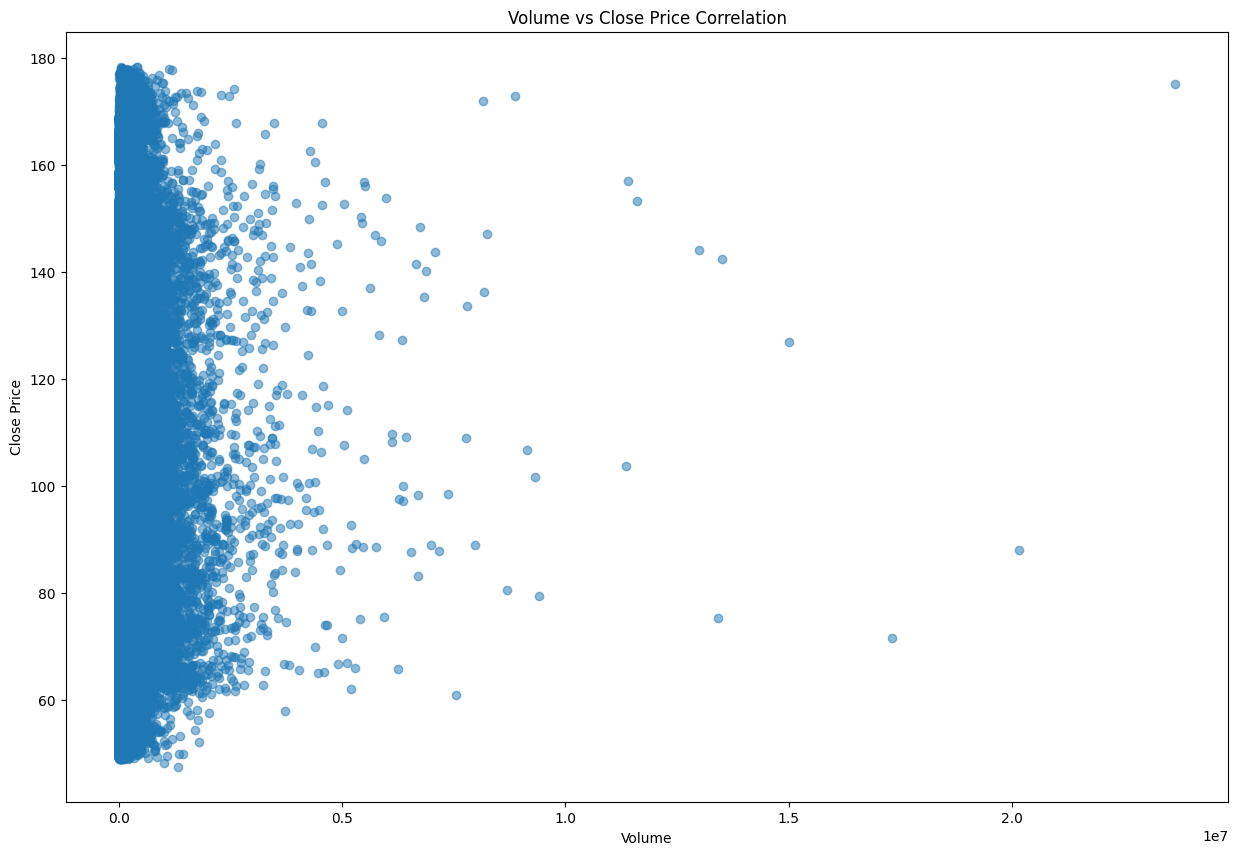

In [11]:
plt.scatter(data['volume'], data['close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs Close Price Correlation')
plt.show()

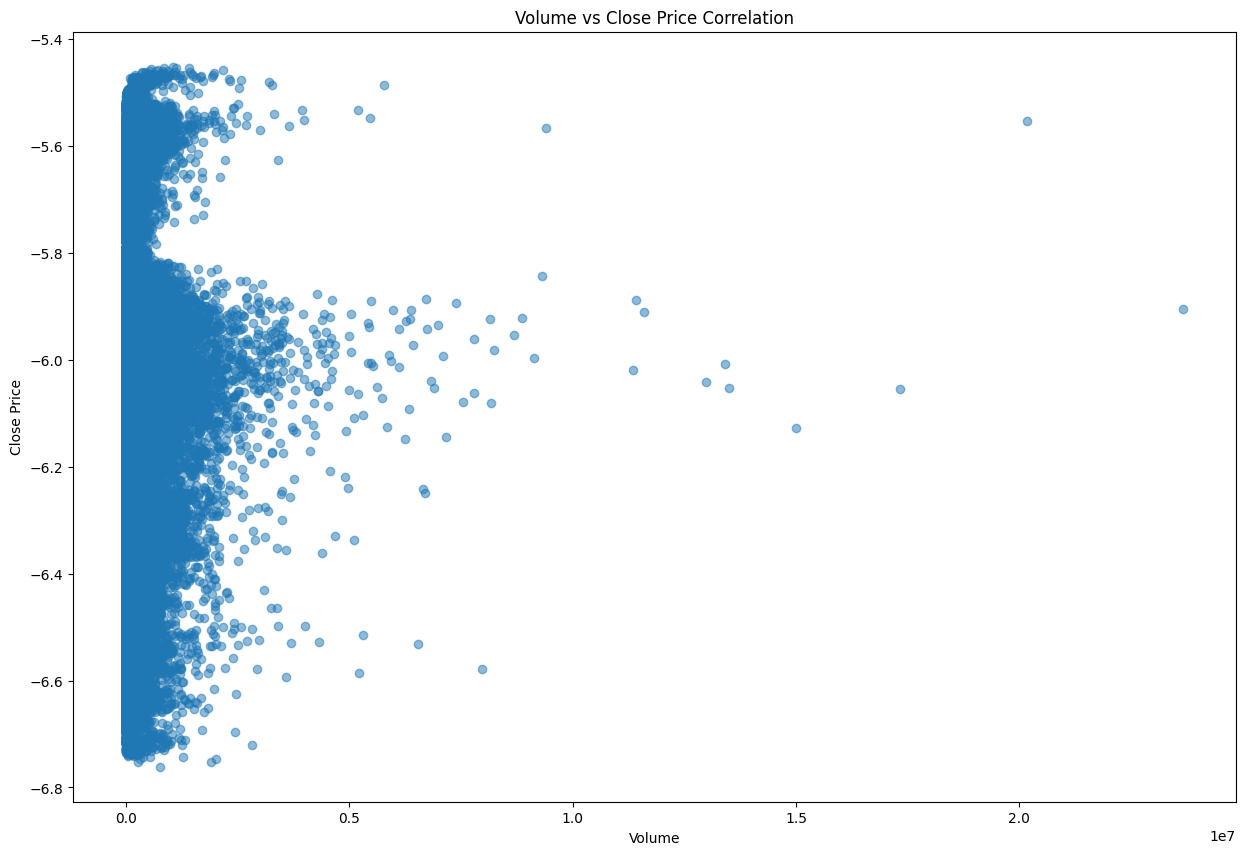

In [12]:
plt.scatter(data['volume'], data['spread'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs Close Price Correlation')
plt.show()

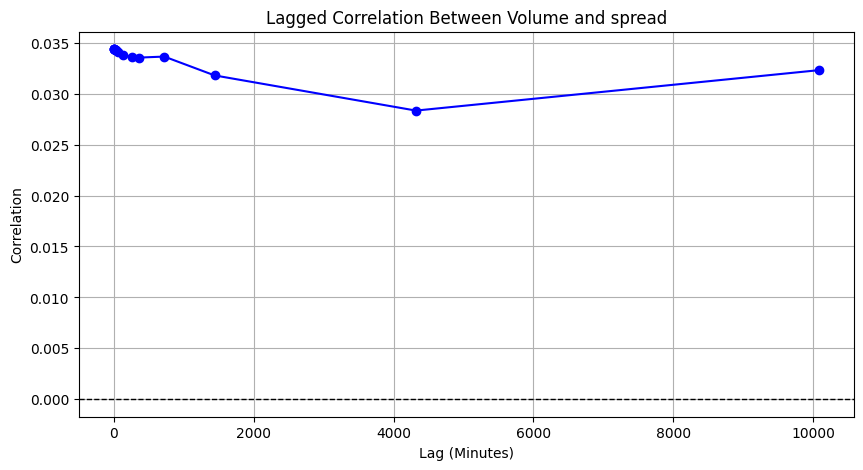

       Correlation
1         0.034353
2         0.034362
4         0.034371
8         0.034357
16        0.034308
32        0.034264
64        0.034073
128       0.033762
256       0.033641
360       0.033550
720       0.033650
1440      0.031800
4320      0.028345
10080     0.032311


In [13]:
lags = [1, 2, 4, 8, 16, 32, 64, 128, 256, 360, 720, 1440, 4320, 10080]
# Store correlations
lagged_corrs = {}
second_col_name = 'spread'
# Compute correlation for each lag
for lag in lags:
    lagged_corrs[lag] = data['volume'].shift(lag).corr(data[second_col_name])

# Convert to DataFrame for plotting
lagged_corr_df = pd.DataFrame.from_dict(lagged_corrs, orient='index', columns=['Correlation'])

# Plot lagged correlations
plt.figure(figsize=(10, 5))
plt.plot(lagged_corr_df.index, lagged_corr_df['Correlation'], marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Lag (Minutes)')
plt.ylabel('Correlation')
plt.title(f'Lagged Correlation Between Volume and {second_col_name}')
plt.grid()
plt.show()

# Display correlation values
print(lagged_corr_df)

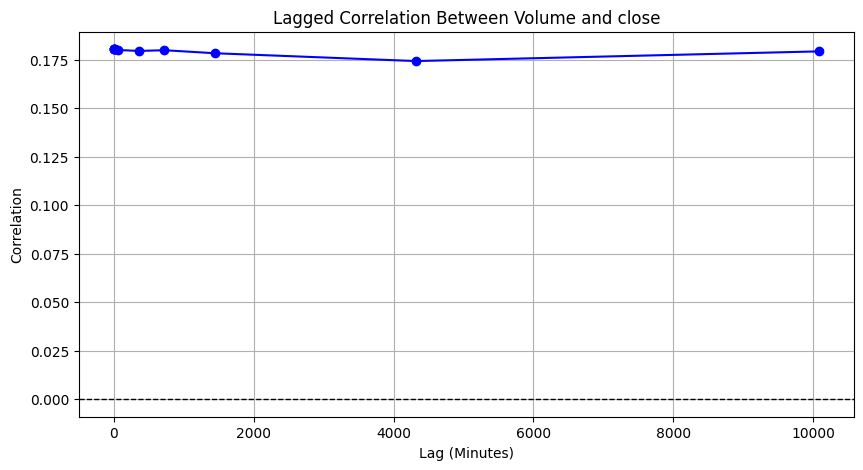

       Correlation
1         0.180468
2         0.180478
4         0.180496
8         0.180472
16        0.180397
60        0.180089
360       0.179608
720       0.179989
1440      0.178431
4320      0.174388
10080     0.179377


In [14]:
lags = [1, 2, 4, 8, 16, 60, 360, 720, 1440, 4320, 10080]

# Store correlations
lagged_corrs = {}
second_col_name = 'close'
# Compute correlation for each lag
for lag in lags:
    lagged_corrs[lag] = data['volume'].shift(lag).corr(data[second_col_name])

# Convert to DataFrame for plotting
lagged_corr_df = pd.DataFrame.from_dict(lagged_corrs, orient='index', columns=['Correlation'])

# Plot lagged correlations
plt.figure(figsize=(10, 5))
plt.plot(lagged_corr_df.index, lagged_corr_df['Correlation'], marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Lag (Minutes)')
plt.ylabel('Correlation')
plt.title(f'Lagged Correlation Between Volume and {second_col_name}')
plt.grid()
plt.show()

# Display correlation values
print(lagged_corr_df)

In [15]:
data[data.volume == 0]

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
188,2023-01-01 03:08:00,51.84,0.0,-5.764577,0.045668,15.177863,0.103524,6.695547,1.642753,0.576123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:07:00,2023-01-01 03:08:00
238,2023-01-01 03:58:00,51.73,0.0,-5.766852,0.028416,24.393190,0.102633,6.753651,1.512143,0.914212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 03:57:00,2023-01-01 03:58:00
686,2023-01-01 11:26:00,51.81,0.0,-5.765881,0.083740,8.277418,29.318807,0.023642,1.357240,0.200913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 11:25:00,2023-01-01 11:26:00
1008,2023-01-01 16:48:00,51.66,0.0,-5.770297,0.123929,5.593115,0.105388,6.577070,1.438869,0.046614,...,47.866733,0.100001,6.931412,1.536824,0.082283,0.100000,0.889034,251.911536,2023-01-01 16:47:00,2023-01-01 16:48:00
2516,2023-01-02 17:56:00,53.53,0.0,-5.743461,0.134035,5.171388,0.103390,6.704170,1.118794,0.097860,...,141.821532,0.115396,6.006679,1.315928,0.410689,0.010000,0.774654,447.628924,2023-01-02 17:55:00,2023-01-02 17:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719760,2024-05-14 21:52:00,80.81,0.0,-6.637326,0.054515,12.714846,0.103812,6.676917,1.387687,0.275020,...,58.596855,0.100001,6.931384,1.526551,0.222683,0.024422,0.853311,319.107648,2024-05-14 21:51:00,2024-05-14 21:52:00
721195,2024-05-15 21:47:00,86.16,0.0,-6.641331,0.095515,7.256916,0.113478,6.108181,1.271092,0.058657,...,99.499126,0.100001,6.931402,1.535378,0.197789,0.036215,1.144104,309.596595,2024-05-15 21:46:00,2024-05-15 21:47:00
756515,2024-06-09 10:28:00,93.32,0.0,-6.611322,0.114342,6.062041,0.105247,6.585881,1.333569,0.126109,...,38.606833,0.100003,6.931288,1.401414,0.096975,0.023269,0.813148,317.787067,2024-06-09 10:27:00,2024-06-09 10:28:00
757193,2024-06-09 21:46:00,93.46,0.0,-6.614485,0.069327,9.998266,24.447678,0.028352,1.531453,0.156870,...,15.315207,0.100002,6.931311,1.341506,0.000001,0.010000,0.833102,242.317126,2024-06-09 21:45:00,2024-06-09 21:46:00


Interestengly, spikes in volume can be related to spikes in close and spread, but in general there is no big correleation between them

Also there are some huge spikes in volume at some specific datestamps, might be related to some social media stuff or in general event-driven relationships which I think can be common in cryptomarket, which I will need to check later on

Values of correleation, lagged correleation scatter plots suggests mild market

# Experiment & Validation design & Some notes I found in the data

For this task I will stick to rolling validation, by month, and leave 9th + some poriton of 10th month of 2024 for final tests for my models

To handle missing timestamps I will use simple forward fill imputing of missing values, need to be carefull with data leak (since I was considering other methods like KNNs and stuff).

During rolling validation I will use average PnL across validation splits to determine hyperparams of future models, but final metric for decision making will be PnL over the last testing set (which is from 2024-09-01 till 2024-10-08)

Also, the data from such period does not contain missing timestamps, so here I am not imputing anything. I need to be carefull during validation, however, since my predictions will include missing timestamps, so I will need to fill them, but for total metric calculations I will ignore them

I will also do some naive/basic benchmark strategies such as buy & hold, naive sign of return, maybe a simple MACD crossover.

### Some stuff from the data

* Sometimes volumne is 0, but since proportion is low (only 288 occurences in the entire dataset, I hope it won't affect much the performace of the models)

# Putting away test data

In [16]:
test_data_first_date = pd.to_datetime('2024-09-01')
test_data = data[data['date'] >= test_data_first_date] # final slice of the data for testing

In [17]:
test_data.iloc[1:]['date_lagged'].iloc[0]

Timestamp('2024-09-01 00:00:00')

In [18]:
((test_data.iloc[1:]['date'] - test_data.iloc[1:]['date_lagged']) == pd.Timedelta(minutes=1)).all() # all timestamps are of 1 min range

True

Luckily there are no missing timestamps in test split of the data

In [19]:
test_data.drop(columns=['date_lagged'], inplace=True)
test_data.to_csv('test_data.csv')

/var/folders/d4/kmvfs86566qdvphh5mdyn9lw0000gn/T/ipykernel_57206/1795274228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=['date_lagged', ], inplace=True)


In [20]:
remaining_data = data[data['date'] < test_data_first_date] # remaining data for training
remaining_data.to_csv('remaining_data.csv')

remaining data will be used for rolling evaluation

# Now let's work with remaining training/eval data
First, I will need to fix missing timestamps

In [21]:
remaining_data = pd.read_csv('remaining_data.csv')
remaining_data.drop(columns=['Unnamed: 0'], inplace=True)
remaining_data['date'] = pd.to_datetime(remaining_data['date'])
remaining_data['date_lagged'] = remaining_data['date'].shift(1)

In [22]:
((remaining_data.iloc[1:]['date'] - remaining_data.iloc[1:]['date_lagged']) == pd.Timedelta(minutes=1)).all() # no, not all one-minute range

False

In [23]:
remaining_data.iloc[1:][((remaining_data.iloc[1:]['date'] - remaining_data.iloc[1:]['date_lagged']) != pd.Timedelta(minutes=1))] # 90 rows where time period was not 1 min

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
142963,2023-04-10 06:45:00,75.81,159.201,-5.921043,0.170388,4.068054,0.100000,6.931444,1.144815,0.119861,...,133.411600,0.103929,6.669414,1.577736,0.472957,0.010000,0.852821,412.391126,2023-04-10 06:42:00,2023-04-10 06:45:00
142968,2023-04-10 06:51:00,75.79,7328.897,-5.921583,0.178878,3.874965,0.103124,6.721515,1.018795,0.155700,...,135.272810,0.103850,6.674498,1.549213,0.463589,0.010000,0.848129,413.251987,2023-04-10 06:49:00,2023-04-10 06:51:00
170923,2023-04-29 16:47:00,72.19,1552.082,-6.004668,0.083479,8.303268,0.100001,6.931398,1.467669,0.266689,...,33.006276,0.100001,6.931384,1.379568,0.075529,0.010000,0.695216,294.842084,2023-04-29 16:45:00,2023-04-29 16:47:00
191894,2023-05-14 06:19:00,62.33,953.550,-6.064800,0.228752,3.030124,0.100000,6.931441,1.002214,0.012196,...,17.595084,0.100001,6.931393,1.376895,0.011687,0.010000,0.717306,324.704188,2023-05-14 06:17:00,2023-05-14 06:19:00
192639,2023-05-14 18:45:00,62.46,10912.256,-6.065827,0.059546,11.640547,0.106289,6.521328,1.469923,0.358866,...,34.104191,0.103477,6.698545,1.370503,0.156441,0.010000,0.642444,380.791548,2023-05-14 18:43:00,2023-05-14 18:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417363,2023-10-17 21:50:00,62.69,1573.546,-6.118531,0.000000,NaN,0.099776,6.947022,1.333906,0.935646,...,223.064018,0.115421,6.005384,1.587084,0.257410,0.010000,0.972549,413.411395,2023-10-17 21:48:00,2023-10-17 21:50:00
417370,2023-10-17 21:58:00,62.65,382.191,-6.119264,0.006927,100.070893,0.100906,6.869204,1.526952,0.847954,...,214.088329,0.115653,5.993330,1.491158,0.286028,0.010000,0.974893,409.859816,2023-10-17 21:56:00,2023-10-17 21:58:00
536698,2024-01-08 18:50:00,98.02,28611.769,-6.168044,0.023367,29.663369,0.113734,6.094475,1.450870,0.813195,...,144.273871,0.100005,6.931156,1.434998,0.481819,0.010000,0.989655,411.150595,2024-01-08 18:45:00,2024-01-08 18:50:00
721196,2024-05-15 21:49:00,86.26,33007.741,-6.641661,0.099436,6.970789,0.113028,6.132517,1.175410,0.058199,...,99.917123,0.100001,6.931374,1.537531,0.201620,0.036495,1.143823,309.709930,2024-05-15 21:47:00,2024-05-15 21:49:00


<Axes: xlabel='count'>

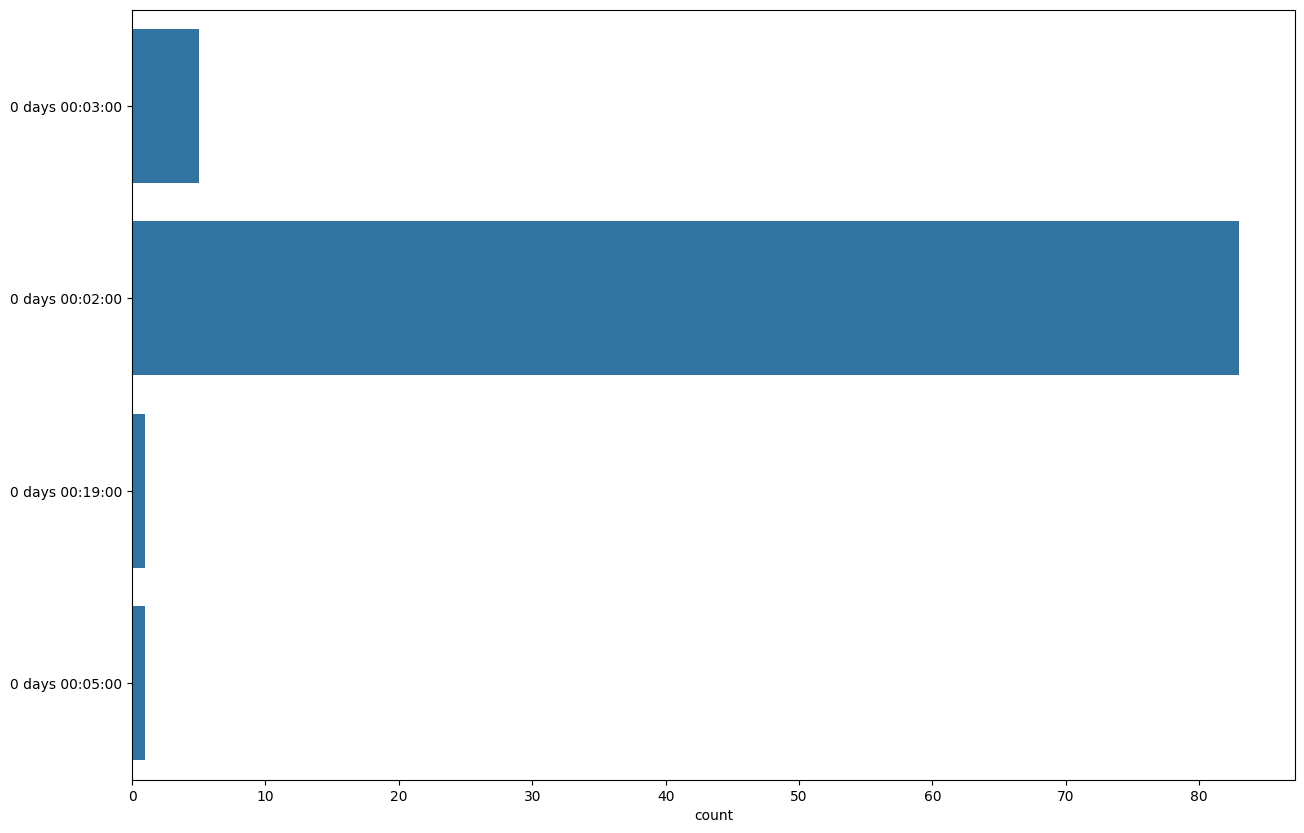

In [24]:
indexes_where_wrong = remaining_data.iloc[1:][((remaining_data.iloc[1:]['date'] - remaining_data.iloc[1:]['date_lagged']) != pd.Timedelta(minutes=1))].index
remaining_data_wrong_time = remaining_data.iloc[indexes_where_wrong]
sns.countplot(remaining_data_wrong_time['date'] - remaining_data_wrong_time['date_lagged'])

Most of the missing timestamps are of the period 2 minutes, meaning only one missing point
Also, there is one large chunk of missing data for 19 minutes, lets check it

In [25]:
large_missing_chunk_idx = remaining_data_wrong_time[(remaining_data_wrong_time['date'] - remaining_data_wrong_time['date_lagged'] == pd.Timedelta(minutes=19))].index.values[0]
remaining_data.iloc[large_missing_chunk_idx - 2 : large_missing_chunk_idx + 2]

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
366194,2023-09-12 08:33:00,52.90,1951.933,-6.189839,0.094819,7.310198,0.107621,6.440626,1.408424,0.154550,...,121.535585,0.104644,6.623848,1.393582,0.659183,0.01,0.919951,321.999541,2023-09-12 08:32:00,2023-09-12 08:33:00
366195,2023-09-12 08:34:00,52.90,0.000,-6.189839,0.086695,7.995270,0.106837,6.487902,1.408368,0.227371,...,122.717554,0.104601,6.626581,1.391310,0.647205,0.01,0.918731,322.688645,2023-09-12 08:33:00,2023-09-12 08:34:00
366196,2023-09-12 08:53:00,52.83,75411.519,-6.190384,0.085496,8.107406,0.106667,6.498230,1.420262,0.247919,...,119.672773,0.104720,6.619048,1.393865,0.646945,0.01,0.918219,323.374557,2023-09-12 08:34:00,2023-09-12 08:53:00
366197,2023-09-12 08:54:00,52.80,37163.576,-6.190048,0.088939,7.793513,0.106854,6.486853,1.459798,0.219871,...,112.485595,0.105023,6.599966,1.406067,0.617541,0.01,0.918879,324.106094,2023-09-12 08:53:00,2023-09-12 08:54:00


Luckily the change in close price does not differ that much, so ffilling should be ok

However volume 0 and missing data makes me think that there was a downtime somewhere during that time, let's check 5 min missing data period

In [26]:
large_missing_chunk_idx = remaining_data_wrong_time[(remaining_data_wrong_time['date'] - remaining_data_wrong_time['date_lagged'] == pd.Timedelta(minutes=5))].index.values[0]
remaining_data.iloc[large_missing_chunk_idx - 1 : large_missing_chunk_idx + 1]

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,date_lagged,timestamp
536697,2024-01-08 18:45:00,98.20,0.000,-6.170616,0.009517,72.835709,0.106130,6.531127,1.446235,0.843337,...,157.058301,0.114460,6.055816,1.420575,0.525288,0.01,0.993886,410.756402,2024-01-08 18:44:00,2024-01-08 18:45:00
536698,2024-01-08 18:50:00,98.02,28611.769,-6.168044,0.023367,29.663369,0.113734,6.094475,1.450870,0.813195,...,144.273871,0.100005,6.931156,1.434998,0.481819,0.01,0.989655,411.150595,2024-01-08 18:45:00,2024-01-08 18:50:00


Same situation here, price did not differ that much, but volume 0 makes me think that the stock exchange was shutdown during that period

Let's leave it as it is, we will fill the close price and spread with forward filling for now
Not sure what to do with volume though, but since such occurences are rare, they hopefully should not affect modelling that much, Let's check whether trading volume was 0 for all times when timeskips occur

<Axes: xlabel='volume', ylabel='Count'>

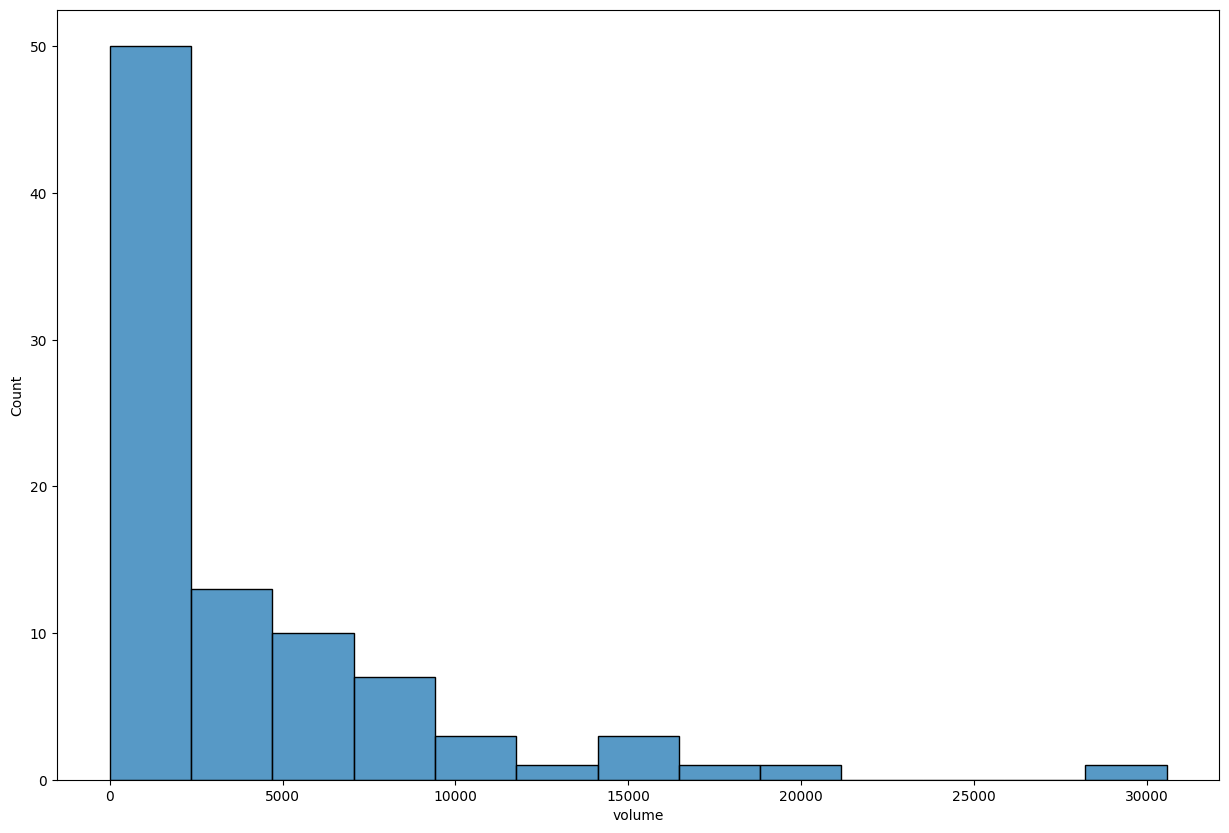

In [27]:
sns.histplot(remaining_data.iloc[(indexes_where_wrong.values - 1)].volume)

Let's check the relative differences between two timestamps where some datapoints is missing, so we can ensure that there are no very big leaps in data, during such changes. Ensuring that would allow us to "safely" forward fill missing values 

In [28]:
def calculate_rel_diff_for_col_during_missing(remaining_data, col_name, missing_chunk_idx, only_nonzeros=False):
    missing_chunk = remaining_data.iloc[missing_chunk_idx]
    if only_nonzeros:
        missing_chunk = missing_chunk[missing_chunk[col_name] != 0]
    
    missing_chunk_tminus1 = remaining_data.iloc[missing_chunk.index.values - 1]
    rel_diffs = (missing_chunk[col_name].values - missing_chunk_tminus1[col_name].values) / missing_chunk_tminus1[col_name].values
    return rel_diffs

def visualize_rel_diffs(rel_diffs):
    sns.histplot(rel_diffs)

/var/folders/d4/kmvfs86566qdvphh5mdyn9lw0000gn/T/ipykernel_56700/774414060.py:7: RuntimeWarning: divide by zero encountered in divide
  rel_diffs = (missing_chunk[col_name].values - missing_chunk_tminus1[col_name].values) / missing_chunk_tminus1[col_name].values


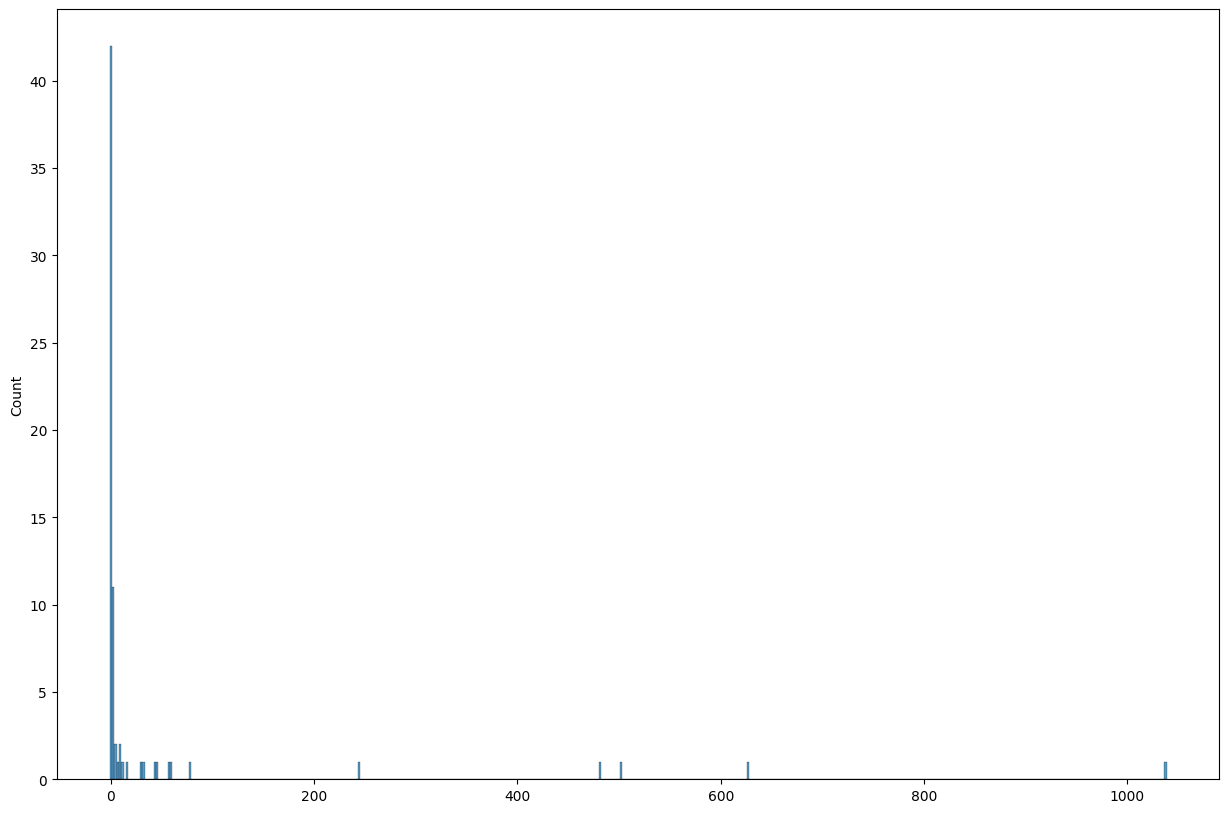

In [29]:
visualize_rel_diffs(calculate_rel_diff_for_col_during_missing(remaining_data, 'volume', indexes_where_wrong.values, only_nonzeros=True))

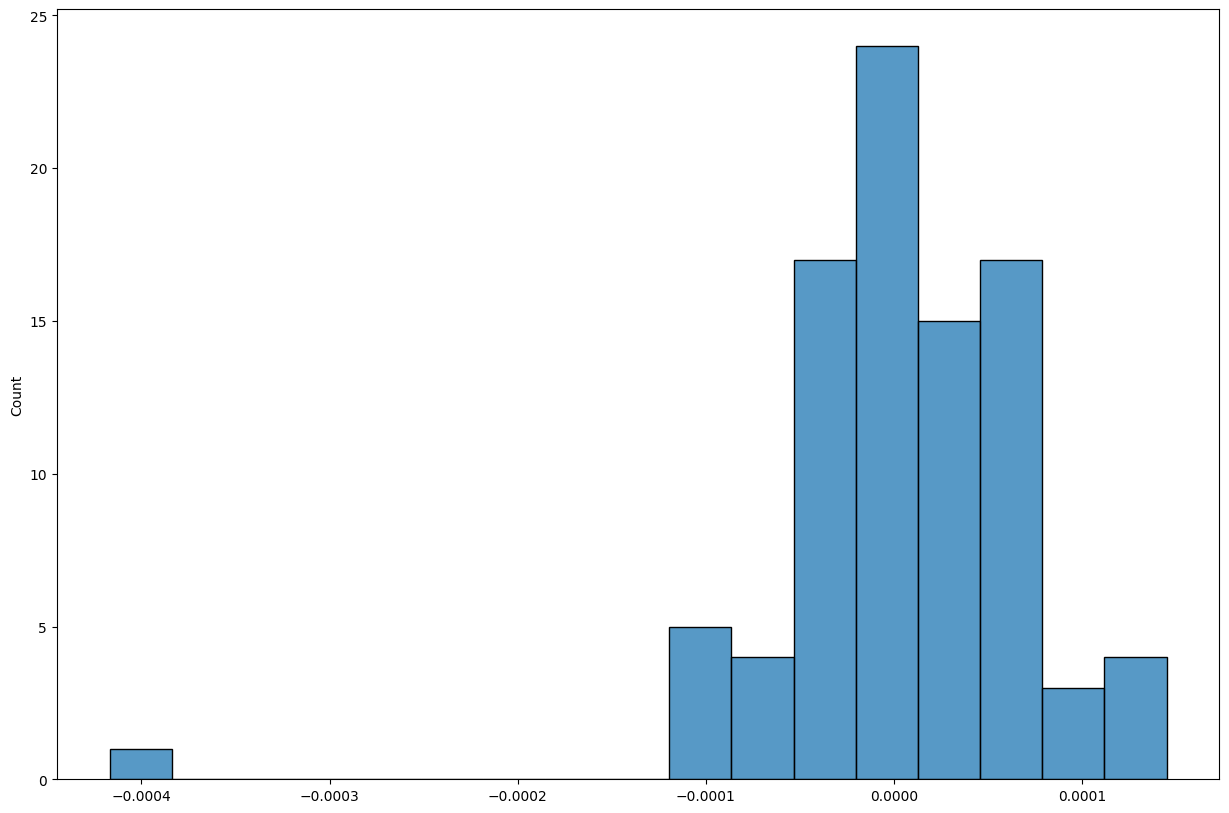

In [30]:
visualize_rel_diffs(calculate_rel_diff_for_col_during_missing(remaining_data, 'spread', indexes_where_wrong.values, only_nonzeros=True))

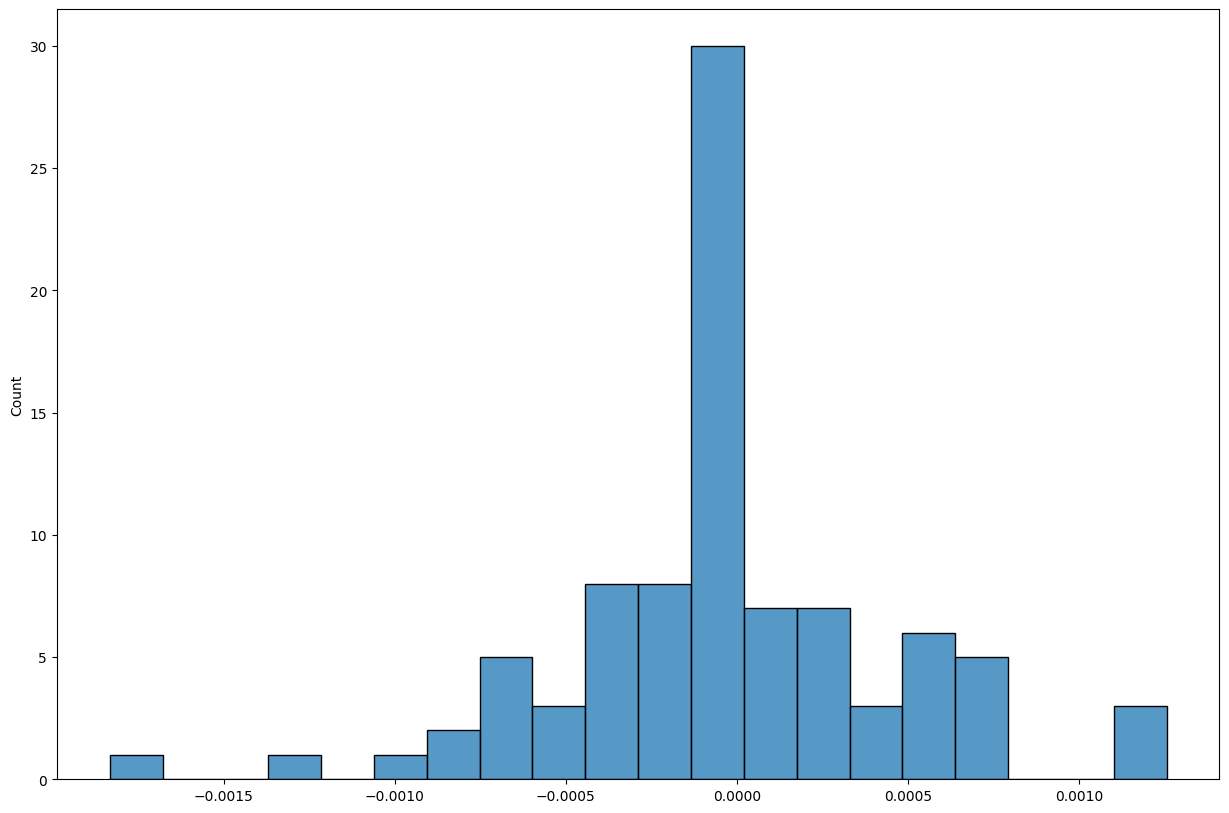

In [31]:
visualize_rel_diffs(calculate_rel_diff_for_col_during_missing(remaining_data, 'close', indexes_where_wrong.values, only_nonzeros=True))

### Summary on analyzing missing timestamps

* Test data contains all of the datapoins so we good here
* Remaining data has some missing timestamps during shutdowns(i think) or other errors

Forward filling should be ok with spread & close prices. Volume need to be more carefull here, but I will assume that we had a shutdown during such times, thus volume will be imputed as 0

**I will not recalculate all of the other features and impute them via forward filling for the sake of time simplicity (I am not sure currently how much time this would take me to do, but indeed this would be important to recalucalte other metrics/statistics using that fact)**


In [32]:
remaining_data['timestamp'] = pd.to_datetime(remaining_data['date'])
remaining_data.set_index('timestamp', inplace=True)
full_range = pd.date_range(start=remaining_data.index.min(), end=remaining_data.index.max(), freq="min")
remaining_data = remaining_data.reindex(full_range)
remaining_data.index.name = "timestamp"


In [33]:
remaining_data.volume.isna().sum()

115

In [34]:
(remaining_data_wrong_time['date'] - remaining_data_wrong_time['date_lagged']).sum()

Timedelta('0 days 03:25:00')

In [35]:
(remaining_data_wrong_time['date'] - remaining_data_wrong_time['date_lagged'] - pd.Timedelta(minutes=1)).sum()

Timedelta('0 days 01:55:00')

Validating that we correctly inserted 115 minutes (1 hrs 55 mins) of additional datapoints

In [36]:
remaining_data['volume'].fillna(value=0, inplace=True)
remaining_data['spread'].ffill(inplace=True)
remaining_data['close'].ffill(inplace=True)

In [37]:
remaining_data.isna().sum()

date                     115
close                      0
volume                     0
spread                     0
mr_strength_ar_100       315
half_life_ar_100       28679
theta_100                318
half_life_ou_100         318
hurst_100                315
adf_p_100                315
kpss_p_100               315
var_ratio_100            315
rs_ratio_100             315
mr_strength_ar_1000     2115
half_life_ar_1000      26815
theta_1000              2117
half_life_ou_1000       2117
hurst_1000              2115
adf_p_1000              2115
kpss_p_1000             2115
var_ratio_1000          2115
rs_ratio_1000           2115
date_lagged              116
dtype: int64

In [38]:
remaining_data.reset_index(inplace=True)


In [40]:
remaining_data.drop(columns=['date_lagged'], inplace=True, axis=1)

In [41]:
remaining_data.to_csv('remaining_data_v1.csv')

I will continue exploring and working with other features, for now I will focus on these three